# Practical Machine Learning for Physicists

## Kernel Density Estimation

This notebook is just a brief aside to demonstrate the method of kernel density estimation

### The algorithm
Let $(x_1, x_2, \cdots x_n)$ be independent samples from some dsitribution with unkown density $f$ at any given point $x$. We want to estimate $f$, the kernel density estimator is:
$$\hat{f}(x) = \frac{1}{n} \sum_{i=1}^n K_{h}(x-x_i) = \frac{1}{nh}  \sum_{i=1}^n K \left(\frac{x-x_i}{h} \right)$$
where $K$ is the kernel and $h>0$ is known as the bandwidth. In principle, $K$ can be anyone of a number of different functions. In practice, $K$ is often taken as the standard normal distribution (mean of 0, sigma of 1)

In [21]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.style #Some style nonsense
import matplotlib as mpl #Some more style nonsense

import scipy.stats as stats
from scipy.stats import gaussian_kde

#Set default figure size
#mpl.rcParams['figure.figsize'] = [12.0, 8.0] #Inches... of course it is inches
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=200 # dots per inch

In [35]:
xVals=np.random.normal(size=(100))

def kde_scipy(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scipy"""
    # Note that scipy weights its bandwidth by the covariance of the
    # input data.  To make the results comparable to the other methods,
    # we divide the bandwidth by the sample standard deviation here.
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return kde.evaluate(x_grid)

Text(0, 0.5, '$\\hat{f}(x)$')

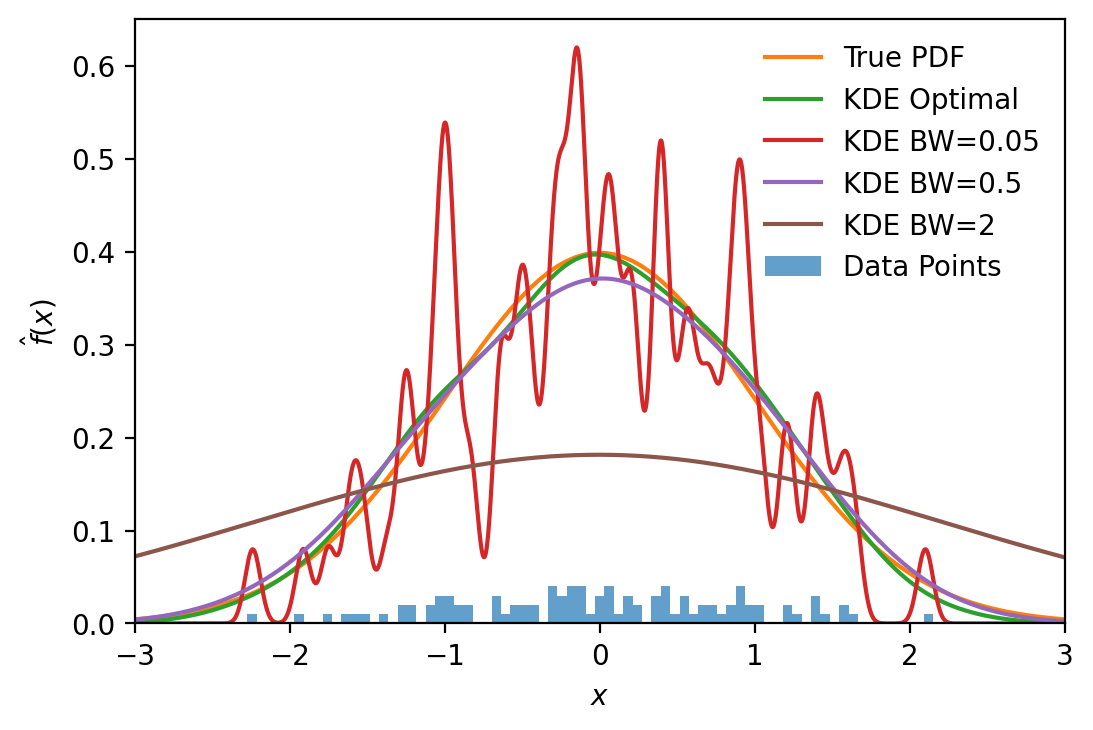

In [137]:
fig,ax=plt.subplots()
bins=np.linspace(-3,3,100)
bins2=np.linspace(-3,3,10000)
_= ax.hist(xVals,bins=bins,alpha=.7,label="Data Points",weights=[0.01]*100)
ax.plot(bins,stats.norm.pdf(bins),label="True PDF")
kde=gaussian_kde(xVals)
ax.plot(bins2,kde.evaluate(bins2),label="KDE Optimal")
for bw in [0.05,0.5,2]:
    ax.plot(bins2,kde_scipy(xVals,bins2,bw),label='KDE BW='+str(bw))
ax.legend()
ax.set_xlim([-3,3])
ax.set_ylim([0,0.65])
ax.set_xlabel("$x$")
ax.set_ylabel("$\hat{f}(x)$")

Text(0, 0.5, '$y$')

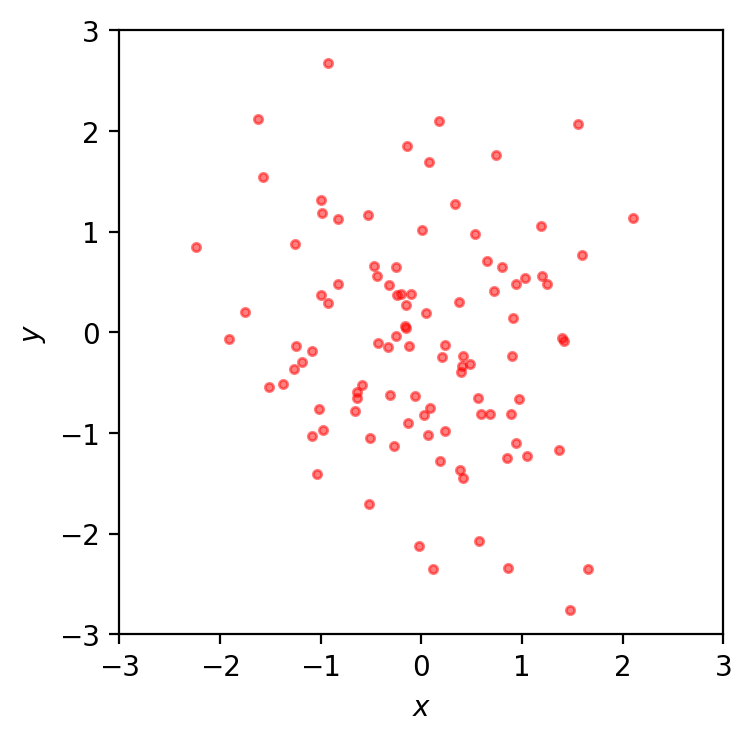

In [122]:
xVals=np.random.normal(size=(100))
yVals=np.random.normal(size=(100))
kde=gaussian_kde([xVals,yVals])
fig,ax=plt.subplots()
ax.plot(xVals,yVals,".",c="r",alpha=0.5)
ax.set_aspect("equal")
ax.set_xlim((-3,3))
ax.set_ylim((-3,3))
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")

In [102]:
def fofz(z):
    # f(z)=z/10 + z/ ||z||
    # There must be a more elegant way of doing this, but the following messy line does work
    # actually I quite like the tiling of the n-element long array into a 2xn array
    return z/10+z/(np.tile(np.linalg.norm(z,axis=0),(2,1)))

Text(0, 0.5, '$y$')

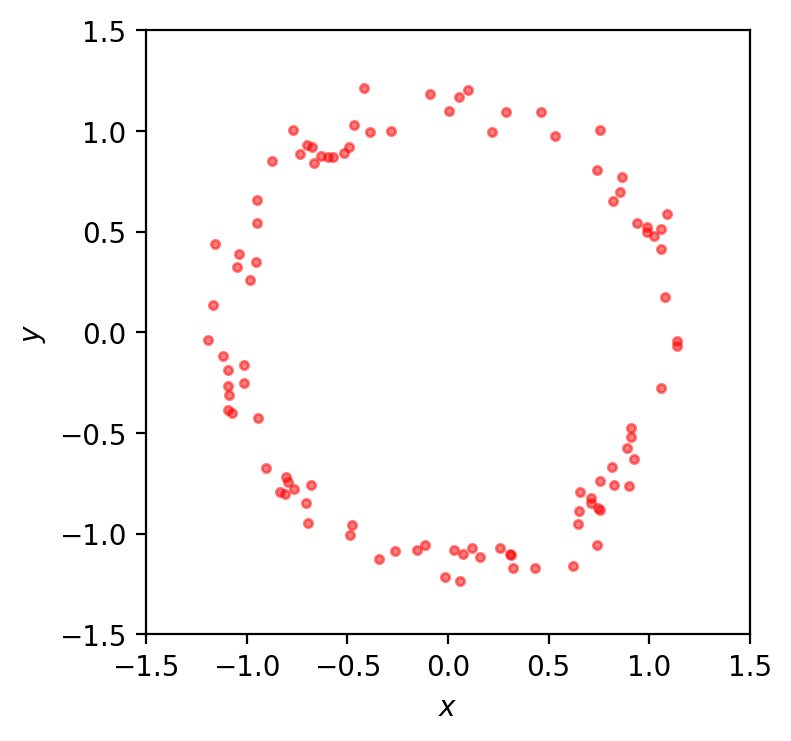

In [123]:
z=np.vstack([xVals,yVals])
fig,ax=plt.subplots()
f=fofz(z)
ax.plot(f[0,:],f[1,:],".",c="r",alpha=0.5)
ax.set_aspect("equal")
ax.set_xlim((-1.5,1.5))
ax.set_ylim((-1.5,1.5))
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")

## Plot KDE as heatmap


Text(0, 0.5, '$y$')

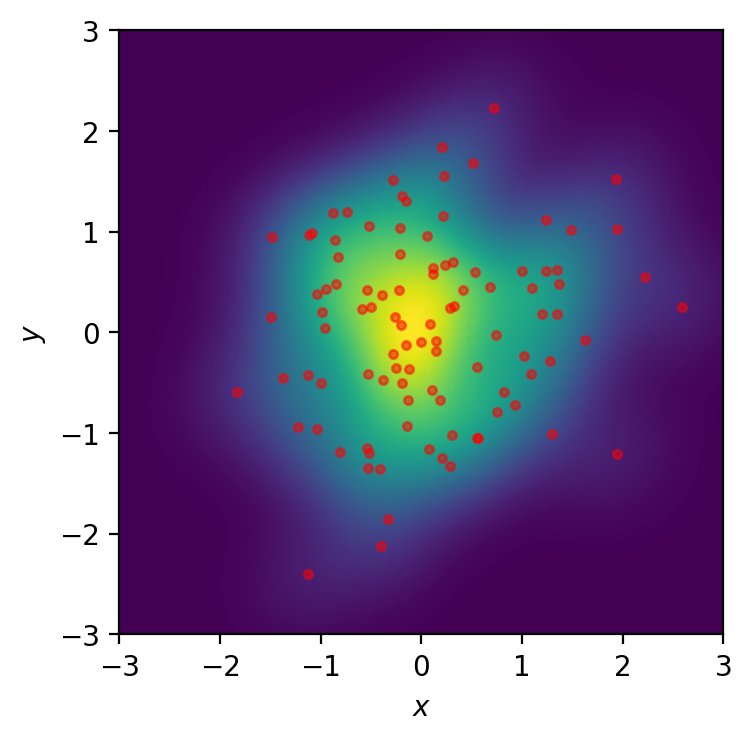

In [121]:
nbins=200
xi, yi = np.mgrid[-3:+3:nbins*1j, -3:+3:nbins*1j]
array=np.vstack([xi.flatten(), yi.flatten()])
                
zi = kde(array)
# Make the plot
fig,ax=plt.subplots()
ax.pcolormesh(xi, yi, zi.reshape(xi.shape),shading='auto',cmap='viridis')
ax.plot(xVals,yVals,".",c="r",alpha=0.5)
ax.set_aspect("equal")
ax.set_xlim((-3,3))
ax.set_ylim((-3,3))
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
